**Submission = string resulting from concatenating all the words (i.e.,removing white spaces). Suppose X and Y are two  submission strings. I will find all the common substrings of length k (k-gram) of the two strings by determining all (i,j) where X[i:i+k]=Y[j:j+k].**

**eg., X="today is Monday", Y="day".
All possible (i,j) from these two strings are (2,0) and (10,0) for k=3 (“day" appears twice in X, and disregard the
white spaces).**

**Algorithm**

**○ Store all length-k substrings of X into a hash table TX with the hash values computed by using rolling
hashing.**

**○ For each substring sy in Y, compute the hash value h(sy) using rolling hashing, and use this hash value to look up sy in table TX. If the lookup is successful, then we have a common substring.**

**○ Specify q for the hash function a mod q in rolling hashing. Choose a prime number with regards to the table size.**

In [5]:
import re
class HashTable():
    """
    A class that implements properties and methods supporting a hash table data structure

    Main Methods
    -------
    prepare data(self, x,y)
        Removes white spaces and nonalphanumeric characters.
    hash function(self, string)
        Computes hash values of substrings 
    hash_table(self,x,y,k)
        Makes hash key entries  into a hash table
    """
    def __init__(self):
        """
        Creates the Hash instance.
        
        Parameters
        ----------
        base
        table size
        overload factor
        
        """
        self.q  = 2399 #prime number of choice. (assuming 26 characters used)
        self.d = 7 #ASCII code with base d -- also a prime number
        self.a = 0 #overload factor
        
    def clean_data(self,x, y):
        """
        Cleans the two input strings x and y
 
        Input:
        - x, y: strings
        Output:
        - strings x and y consisting only of  alphanumeric characters, without white spaces for easy comparisons
        """
        #to avoid confusions, set x to always be the longer string
        if len(y)> len(x):
            x,y = y,x
        
        
        #x.replace(" ", "") #removing whitespaces didn't work as expected
        #removes anything that is non-alphanumeric
        x = re.sub('[^A-Za-z0-9]+', '', x).lstrip()
        y = re.sub('[^A-Za-z0-9]+', '', y).lstrip()
    
        #change all entries to lower case
        x = x.lower()
        y = y.lower()

        return x,y
        
    def hash_function(self, string):
        """
        Computes hash values of substrings using using python's inbuild ord() function
        
        Input:
        - x, y: strings
        Output:
        - generated hash values
        """
        hash_val = [ord(string[i])*self.d**(len(string)-i-1) for i in range(len(string))]
        hash_val = sum(hash_val)%self.q
        return hash_val
    
    def rolling_hashing(self,hash_val, string,k,i):
        """
        Utilizes previous hash values to update hash values as the window slides through string x
        
        Parameters
        ----------
        hash_val: int
            The hash value generated by hash_function()
        k: int
            The length of substring
        i: int
            The index of the key to be modified

        Returns
        ----------
        new hash value
        """
        hash_val = (hash_val*self.d + ord(string[k+i]))%self.q #adds hash value of the new character
        hash_val = (hash_val-ord(string[i])*(self.d**(k)%self.q))%self.q #subtracts hash value of the element removed from sliding window
        return hash_val
    
        
    def hash_table(self,x,y,k):
        """Inserts hash values into a hash table.
        
        Parameters
        ----------
        x, y : strings
        k : length of substring
        
        """
        hashtable = [[] for n in range(self.q)] #did not use dict since a hashtable is already in key-value pair form
        hash_val = self.hash_function(x[0:k])
        hashtable[hash_val].append(0)
        
        for i in range(len(x)-k):
            if self.a > 0.7*self.q: # enlarge bucket array if overload factor exceeds 0.7 to prevent slowing down
                return self.enlarge_bucket_array()
                
            hash_val = self.rolling_hashing(hash_val, x,k,i)
            hashtable[hash_val].append(i+1) #start position of substring is added to the table
        
        return hashtable 
    
    def enlarge_bucket_array(self):
        """
        size of the array is increased
        """
        self.q = self.q*2 #increament table size
        self.a = 0 #reset overload factor to avoid recursively calling the enlarge_bucket_array method
        return False

    def rh_get_match(self,x,y,k):
        """
        Finds all common length-k substrings of x and y
        using rolling hashing on both strings.
        Input:
        - x, y: strings
        - k: int, length of substring
        Output:
        - A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
        """
        #clean strings
        x,y = self.clean_data(x,y)
        #store hash values in a hash table              
        hashtable = self.hash_table(x,y,k)
        
        
        #initialize list of common substrings
        common_subs = []
    
        key = self.hash_function(y[0:k])
        
        for j in range(len(y)-k+1):
            if hashtable[key]: #Checks if there are any hits 
                for i in hashtable[key]:
                    if x[i:i+k] == y[j:j+k]: #character comparison
                        common_subs.append((i,j)) #adds substring to the list if they are similar
                        
            if len(y) > k and k+j<len(y): 
                key = self.rolling_hashing(key, y,k,j)
                
        return common_subs
    
    def longest_cs(self,x,y):
        """
        Computes the b and c tables required to read-off an LCS of strings x and y.
    
        Inputs:
        - x, y: strings
    
        Outputs:
        -a list of lists of ints OR a numpy array. [i,j] contains the length of a LCS of x[:i] and y[:j]
    
        """
        x,y = self.clean_data(x,y)
        #longest common substring
        len_lcs = len(y) 
         
        for k in range(1,len(y)): 
            common_subs = self.rh_get_match(x,y,k)
            if not common_subs: #Terminating consition
                len_lcs = k-1
                break
        
        total_lcs = len(self.rh_get_match(x,y,len_lcs)) # total common substrings
        #return similarity score as a percentage
        return (len_lcs*total_lcs)/len(x)*100

**Non-trivial test cases.**


In [6]:
#General Test case
test = HashTable()

X = "today is Monday"
Y = "day"

test.rh_get_match(X, Y, 3)

[(2, 0), (10, 0)]

In [7]:

#Test Cases
test = HashTable()

flashlight = """I got all I need when I got you and I
I look around me, and see a sweet life
I'm stuck in the dark but you're my flashlight
You're getting me, getting me through the night
Kick start my heart when you shine it in my eyes
Can't lie, it's a sweet life
I'm stuck in the dark but you're my flashlight
You're getting me, getting me through the night
'Cause you're my flashlight (flashlight)
You're my flashlight (flashlight)
You're my flashlight"""

umbrella = """These fancy things will never come in between
You're part of my entity, here for infinity
When the world has took its part
When the world has dealt its cards
If the hand is hard, together we'll mend your heart
Because
When the sun shines, we shine together
Told you I'll be here forever
Said I'll always be your friend
Took an oath, I'ma stick it out 'til the end
Now that it's raining more than ever
Know that we'll still have each other
You can stand under my umbrella"""

solo1 = """
These fancy things will never come in between
You're part of my entity, here for infinity
When the world has took its part
"""

solo2 = """
When the world has dealt its cards
If the hand is hard, together we'll mend your heart
"""

#test for alphanumeric replacements
a = ' m[y] faVo__rite Mem??^^ory is oF YOU'
b = 'my favorite memory is of you'

#test for empty string
c = ''
d = '123'


print(f"Similarity score: {test.longest_cs(flashlight, umbrella)}%")    
print(f"Similarity score: {test.longest_cs(solo1, solo2)}%")      
print(f"Similarity score: {test.longest_cs(a, b)}%")     
print(f"Similarity score: {test.longest_cs(c, d)}%")     

Similarity score: 1.8970189701897018%
Similarity score: 15.306122448979592%
Similarity score: 100.0%
Similarity score: 0.0%


In [8]:
print(test.rh_get_match(flashlight, umbrella, 5))
print(test.rh_get_match(solo1, solo2, 5))


[(38, 75), (38, 92), (161, 141), (95, 143), (96, 144), (97, 145), (36, 148), (183, 153), (191, 153), (38, 207), (38, 224), (168, 262), (241, 266), (38, 267), (38, 294), (38, 321)]
[(72, 0), (73, 1), (74, 2), (75, 3), (76, 4), (77, 5), (78, 6), (79, 7), (80, 8), (81, 9), (82, 10)]


**FUNCTIONALITY**

Rolling hashing

The implementation of rolling hashing involves having a window that slides through the input, saving us time in computing the hash value of the next substring. We simply dropping the initial character and adding a new character, within the scope of the window. For example given the hash value of a k-length substring ‘abc’, where k = 3, to compute the hash value of ‘bcd’, we would simply remove a and add ‘d’ to ‘bc’, and compute the hash value by subtracting the hashcode of ‘a’ from the previous hash code, multiplying by the determined prime number(base) then adding the hash code of the newly added element. That is, 

h(bcd) = h(abc) - h(a) * base + h(d)

This saves a lot on computational cost as it allows us to take the hash of the previous window and  adjust it a little to accommodate for the character inserted, and we subtract the hash of the character no longer in the window,  instead of beginning from scratch for each insertion. 

I design my plagiarism detector for specific application in the music industry for detecting plagiarism in songs or frequency of words in any particular song. Typical songs have an average number of 250-280 words, but I use 'The Rise and Fall of Bossanova' by PC III which is the longest song ever released to define the upper bound for my modulus. The song has exactly 479 words and 2291 characters.  

We select a base 'd' constant raised to the power that corresponds to its position and should be prime because it increases the chances of generating a unique value for a hash function. A multiplier larger than the largest value in the alphabet helps avoid collisions. 32-127 ASCII codes represent printable character, so since I know the maximum ASCII code will have a value of 127, I can pick any multiplier larger than that, which is why I use 131. The modulus should be a prime number significantly larger than n^2 (i.e. 60 bit), which makes collisions less likely and no specific inputs would cause the algorithm to run slowly as we do not suffer from the accumulated factors of n in the error bounds. If the constant used in the hash, and the number of buckets, are coprime,  collisions are minimised in some common cases. For this reason, I picked my modulus as 2399, which is both a prime number and larger than the element size, assuming no song released will be longer than 'The Rise and Fall of Bossanova'. This avoids the birthday paradox which states that the probability that, in a set of n randomly chosen people, at least two will share a birthday.


**2. Second version of this algorithm:**

**○ Store all length-k substrings of X into a hash table TX, using a hash function that does not entail the
division method.**

**○ For each substring sy in Y, compute the hash value h(sy) and use this hash value to look up sy
in table TX. If the lookup is successful, then we have a common substring.
Note that using a hash function that does not entail the division method prohibits the use of rolling hashing.
Asymptotically speaking, we are essentially taking more time for computing hash values in this version.
However, we are now free to choose a more fancy function, so there is a tradeoff here.**


In [9]:
class cuckoo(HashTable):   
    """
    A class that implements properties and methods supporting a cuckoo hashing technique

    Main Methods :
        utilizes methods in the HashTable class --> use super() method to carry out multiple inheritance
    -------
    
    second hash function(self, item )
        Removes white spaces and nonalphanumeric characters.
    second hash function(self, string)
        Computes hash values of substrings 
    hash_table(self,x,y,k)
        Makes hash key entries  into a hash table
    """
    
    def __init__(self):
        """
        Creates the Hash instance.
        
        Parameters
        ----------
        base
        table size
        overload factor
        
        """
        super().__init__()
        self.i = 0
        self.rehash_counter=0 
        
    def hash_function_2(self, string): #second hash function
        """
        Computes hash values of substrings using using python's inbuild ord() function
        Is the alternative of the first function since we use 2 hash tables and 2 hash functions
        
        Input:
        - x : str
        Output:
        - generated hash values
        """
        hash_val = 0
        for el in string:
  
            hash_val = hash_val * 131 + ord(el) + 2^self.i #multiplier larger than the largest in the alphabet to avoid collisions
        return hash_val % self.q
        
    def insert(self, x,j,k, hashtable,cycles):
        """
        Makes insertions into either of the two hash tables
        
        procedure insert(x)
        if lookup(x) then return
            loop MaxLoop times
            x ↔ T1[h1(x)]
            if x = ⊥ then return
            x ↔ T2[h2(x)]
            if x = ⊥ then return
            end loop
        rehash(); insert(x);
        end
        """
        key = self.hash_function(x[j[0]:j[0]+k])  

        # Empty slot found
        if hashtable[key] ==None: 
            hashtable[key]= j
            self.a+=1
            
        # if collision occurs
        elif x[j[0]:j[0]+k] == x[hashtable[key][0]:hashtable[key][0]+k]: 
            hashtable[key].extend(j)
        
        # use second hash function to add key to the other hash table
        else: 
            hashtable[key], j = j, hashtable[key]
            key = self.hash_function_2(x[j[0]:j[0]+k])

            # empty slot found
            if hashtable[key] ==None: 
                hashtable[key] = j
                self.a +=1

            # Collision occurs
            elif x[j[0]:j[0]+k] ==  x[hashtable[key][0]:hashtable[key][0]+k]: 
                hashtable[key].extend(j)

            # if a collision occurs, use first hash function again
            else: 
                cycles +=1
            
                if cycles > 7: #terminating condition
                    return False
                return self.insert(x,j,k,hashtable,cycles)
        
        return True
    #when overload factor approaches 1
    def enlarge_bucket_array(self):
        """
        size of the array is increased
        """
        
        super().enlarge_bucket_array()
        self.rehash_counter = 0
        self.i = 1
    
    def rehash(self):
        """
        all the values are hashed again when stored in the double sized array 
        to maintain a low load factor and low complexity.
        """
        self.i +=1 #This creates variance in hash function 2
        self.a = 0
        self.rehash_counter +=1
    
    def build_hashtable(self, x,k):
        """Inserts hash values into a hash table.
        
        Parameters
        ----------
        x : string
        k : length of substring
        
        """
        hashtable = [None for n in range(self.q)]
        cycles = 0                

        for i in range(len(x)):
            if self.rehash_counter > 4 or self.a > 0.7 * self.q * 2:
                self.enlarge_bucket_array()
                return False
            else:
                if self.insert(x,[i],k, hashtable,cycles) is False:
                    self.rehash()
                    return False
                
        return hashtable
    
    def regular_get_match(self, x,y,k):
        """
        Finds all common length-k substrings of x and y
        NOT using rolling hashing on both strings.
        Input:
          - x, y: strings
          - k: int, length of substring
        Output:
          - A list of tuples (i, j)
          where x[i:i+k] = y[j:j+k]
        """
        x,y = self.clean_data(x,y)
        
        hashtable = self.build_hashtable(x,k)

        # enlarges bucket array or uses second hash function
        if hashtable == False:
            return self.regular_get_match(x,y,k)
                
        #initialize list of common substrings
        common_subs =[]

        for j in range(len(y)-k+1):
            key1 = self.hash_function(y[j:j+k])
            key2 = self.hash_function_2(y[j:j+k])
            
            common_char = []
            
            try: 
                # Checks if both substrings have the same characters
                if x[hashtable[key1][0]:hashtable[key1][0]+k] == y[j:j+k]: 
                    common_char.extend(hashtable[key1])
            except:
                pass
            
            try:
                # Checks if both substrings have the same characters
                if x[hashtable[key2][0]:hashtable[key2][0]+k] == y[j:j+k]: 
                    common_char.extend(hashtable[key2]) 
            except:
                pass
            
            if common_char:
                common_subs.append((common_char, j))

        return common_subs
    
    def table_of_similarity(self,x,y,k):
        """
        shows common substrings and positions in a table format
        Input:
          - x, y: strings
          - k: int, length of substring
        Output:
         table : common substrings
        """
        common_subs = self.regular_get_match(x,y,k)
        x,y = self.clean_data(x,y)
        
        df = pd.DataFrame(common_subs,columns = ["x",'y'])
        
        # Column for substring represented by index
        df['X String'] = [x[common_subs[i][0][0]:common_subs[i][0][0]+k] for i in range(len(common_subs))]
        df['Y String'] = [y[common_subs[i][1]: common_subs[i][1]+k]for i in range(len(common_subs))]
        return df
        

In [10]:
#General Test case
test2 = cuckoo()

X = "today is Monday"
Y = "day"

test2.regular_get_match(X, Y, 3)

[([2, 10], 0)]

In [11]:
print(test2.regular_get_match("2d,a,y is Mon D A Y!!!", "day", 8))
print(test2.regular_get_match(flashlight, umbrella, 5))
print(test2.regular_get_match(solo1, solo2, 5))



[]
[([38], 75), ([38], 92), ([161], 141), ([95], 143), ([96], 144), ([97], 145), ([36], 148), ([183, 191], 153), ([38], 207), ([38], 224), ([168], 262), ([241], 266), ([38], 267), ([38], 294), ([38], 321)]
[([72], 0), ([73], 1), ([74], 2), ([75], 3), ([76], 4), ([77], 5), ([78], 6), ([79], 7), ([80], 8), ([81], 9), ([82], 10)]


In [12]:
print(f"Similarity score: {test2.longest_cs(flashlight, umbrella)}%")    
print(f"Similarity score: {test2.longest_cs(solo1, solo2)}%")      
print(f"Similarity score: {test2.longest_cs(a, b)}%")     
print(f"Similarity score: {test2.longest_cs(c, d)}%")  

Similarity score: 1.8970189701897018%
Similarity score: 15.306122448979592%
Similarity score: 100.0%
Similarity score: 0.0%


In [13]:
#displays similarity
import pandas as pd
test2.table_of_similarity(solo1, solo2, 5)

,x,y,X String,Y String
0,[72],0,whent,whent
1,[73],1,henth,henth
2,[74],2,enthe,enthe
3,[75],3,nthew,nthew
4,[76],4,thewo,thewo
5,[77],5,hewor,hewor
6,[78],6,eworl,eworl
7,[79],7,world,world
8,[80],8,orldh,orldh
9,[81],9,rldha,rldha


**FUNCTIONALITY**

Cuckoo hashing

Cuckoo hashing was an interesting technique for me to implement as it works the same way a cuckoo chick does by pushing an egg from its nest to create room for itself in the nest, which is how the name was derived. It uses two arrays and two hash functions, and inserts a new element in the first hash table. If there is a collision, the existing element is evicted, and inserted into the second hash table. If a collision occurs in the second hash table, the second existing element is pushed into the first hash table and the process occurs iteratively until and empty location for the key is found. It is possible for both functions to provide indices to  The code works as below:

a. Location = Hash of Key using Hash function Fn. 

b. If location is occupied, take out old Key and place new Key. 

c. Key = old Key and Hash function Fn = alternate function (Fn2). 

d. Repeat step (a) until the location is empty. 


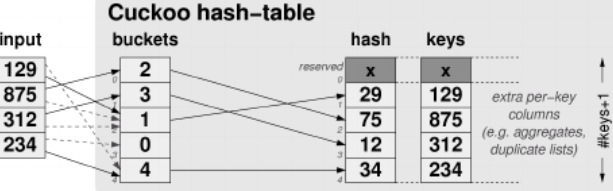

In [11]:
from IPython.display import Image
Image(filename='cuckoo.png')


In [14]:
import IPython.display as display
import ipywidgets as widgets

img1=open('cuckoo1.png','rb').read()
wi1 = widgets.Image(value=img1, format='png', width=500, height=400)
img2=open('cuckoo2.png','rb').read()
wi2 = widgets.Image(value=img2, format='png', width=300, height=400)
a=[wi1,wi2]
wid=widgets.HBox(a)
display.display(wid)

With regular hashing, instead of chained hashing where one would have to follow pointers to search linked lists, I opt for an open addressing approach which is faster than chained hashing when the load factor is low as we do not need to follow pointers between list nodes. As the load factor, ‘a’ in my case, approaches 1, the algorithm gets slower before we can find an empty slot, or the key we are looking for, but I account for this by allocating a new bucket array, and copying elements from the old one into the new one, then freeing the old one when the load factor gets above a specified value - I use 0.7 in my algorithm, although the default is normally 0.75 within in the enlarge_bucket_array() method. The size bucket array size is increased (doubled) and all  values  hashed again to maintain a low load factor and low complexity. This is what is referred to as  rehashing. 


Deletions in open addressing may slow down the runtime if an implementation is prone to clustering but since the context of application for my algorithm does not entail any deletion operations, I do not need to worry about this. 

I selected hashing functions that tried to ensure simple uniform hashing. Uniformity in this case means that approximately the same probability is used to generate all hash values in the output range. That is, no hash values should occur more frequently than others as more collisions would occur, meaning many inputs are mapped to the same hash code. Collisions happen when the hash function of choice assigns the same indices to multiple key-value pairs. This negatively impacts our runtime complexity as it would have to search through many colliding entries. This renders our choice of data structure and algorithm useless, since the point was to perform operations in constant time. The plots below illustrate how my algorithms to a pretty good extent maintain simple uniform hashing. 

In [13]:
# To check uniformity of hashing
import random 
import matplotlib.pyplot as plt

def hash_function_2(item, i):
    hash_val = 0
    for el in item:
        hash_val = hash_val * 128 + ord (el) + 2^i
    return hash_val % 2399

letters = "abcdefghijklmnopqrstuvwxyz" 
keys = []

for i in range(3):
    keys.append([])
    for x in range(10000):
        item = random.choices(letters, k = 5)
        keys[i].append(hash_function_2(item,i))

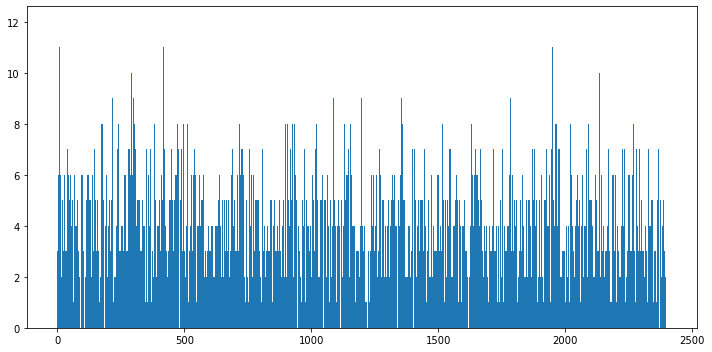

In [14]:
# Plot for second version of hash function  at q 1
plt.hist(keys[0], bins = 2399)
plt.show()

**3. How I would use the code above to investigate the extent of plagiarism.**



To investigate the extent of plagiarism, I would check for k-length common substrings, by using a higher value of k, which would take care of the problem where the code may consider  some generic words like: ‘a’, ‘is’, ‘the’, ‘and’, and so on as plagiarized. I would then return a similarity score which can be used to interpret whether or not two strings are plagiarized versions of each other, by limiting the aspect of subjectivity, and trusting numbers, since numbers do not lie!  Hashing in general is a very effective technique and might be our best choice of approach when designing an efficient algorithm for plagiarism detection, because we can always guarantee O(1) runtime for insert, search and delete operations. However, in real world applications the choice of hash functions is challenging, and in many instances presents the problem of collisions invalidating our assumption of simple uniform hashing. The better the hash function acts as a random number generator, the better it is. The hash function used determines the overall performance of the algorithm, and I will later explain how my two algorithms differ in functionality but achieve the same goal, with varying complexities. A brute force approach would still provide a solution to the same problem but at a higher cost. If we have two strings, say X of length n and Y of length m,  assuming n > m, we would have a window sliding through X, comparing X’s substring with Y at each step under the window, and keep sliding as long as there is no match, until the end of X. We would have a nested loop where we check O(m) times, corresponding to Y’s length through all of the length of X, making O(n) slides. This approach would have a total runtime complexity of O(nm), which is much worse than the cuckoo hashing or rolling hashing technique. 



**4. Time complexity of each algorithmic version.**


Rolling hashing takes O(k) to compute the hash value of the first substring, iterating over every of its characters, and takes O(1) to find the rest of n-k characters. Total complexity will thus be O(k + n - k) = O(n). Once we store all hash values, it is guaranteed that substrings can be compared in O(1). Deletions also take O(1) runtime. The algorithms massively saves on computational cost as we utilize previous hash values to compute new hash values, instead of beginning from scratch. 
 
With cuckoo hashing, insertion time scales linearly, as a linear number of keys can be "cuckooed" out of their slots for an insertion even when the load factor is under the capacity threshold, hence cuckoo hashing is not optimal when we care about latency. Total time Complexity is O (n) as for every insert n number of locations are looked up before any insertion. For lookups, a key must be present at one of exactly two locations found by either of the two functions which takes O(1) runtime even in worst case scenarios. Deletion will also take O(1) as no probing is necessary. 


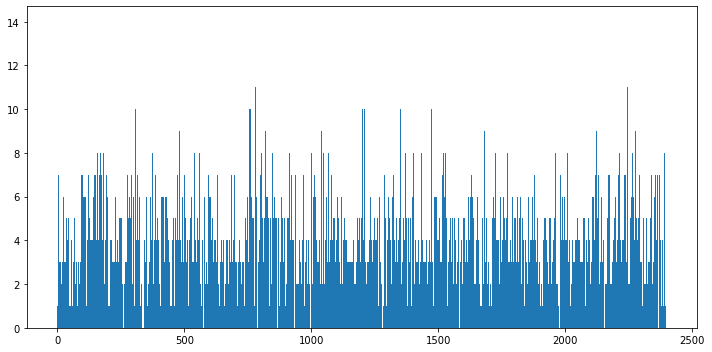

In [18]:
# Plot for second version of hash function at q 2 
plt.hist(keys[1], bins = 2399)
plt.show()

In [19]:
#check for number of collisions

test_col = random.choices(letters, k=10000)
test_col1 = random.choices(letters, k=10000)
test_col= ''.join(test_col)
test_col1 = ''.join(test_col1)
    
common_subs = test2.regular_get_match(test_col,test_col1, 3)
substrings_in_bucket =  0
bucket = 0

for sub in common_subs:
    substrings_in_bucket += len(sub[0])

print(f"Average number of substrings per bucket is: {substrings_in_bucket/len(common_subs)}")

Average number of substrings per bucket is: 1.3090784671532847


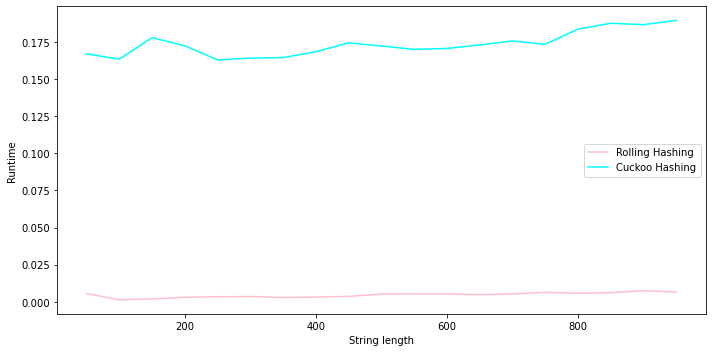

In [22]:
# Plot for rolling hash vs cuckoo hash for length of string
import time

roll_hash = []
cuck_hash = []

for x in range(50, 1000, 50):
    string1 = 0
    string2 = 0
    time1 = 0
    time2 = 0
    for i in range(50): #Iterations
        string1 = random.choices(letters, k=x)
        string2 = random.choices(letters, k=x)
        string1= ''.join(string1)
        string2 = ''.join(string2)
        
        begin = time.time()
        test.rh_get_match(string1,string2, 5)
        end = time.time()
        time1+= (end-begin)

        begin = time.time()
        test2.regular_get_match(string1, string2, 5)
        end = time.time()
        time2+= (end-begin)

    roll_hash.append(time1/50)
    cuck_hash.append(time2/50)
    
k = [k for k in range(50, 1000, 50)]
plt.plot(k,roll_hash, color = 'pink', label = 'Rolling Hashing')
plt.plot(k,cuck_hash, color = 'aqua', label = 'Cuckoo Hashing')
plt.xlabel("String length")
plt.ylabel("Runtime")
plt.legend()

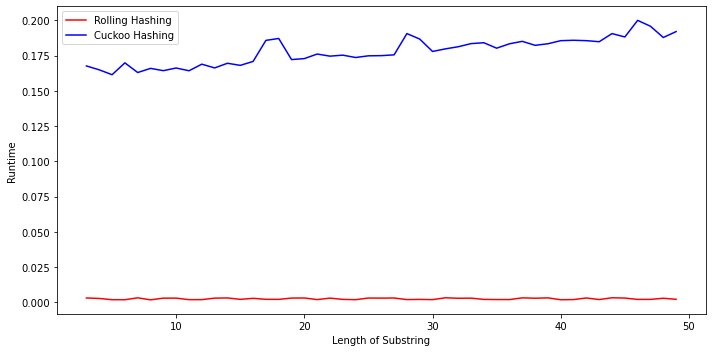

In [42]:
# Plot for rolling hash vs cuckoo hash for length of substring

string1 = random.choices(letters, k=200)
string2 = random.choices(letters, k=200)
string1 = ''.join(text1)
string2 = ''.join(text2)

roll_hash = []
cuck_hash = []

for x in range(3, 50):
    time1 = 0
    time2 = 0
    for i in range(50): #Iterations
        begin = time.time()
        test.rh_get_match(string1,string2, x)
        end = time.time()
        time1+= (end-begin)

        begin = time.time()
        test2.regular_get_match(string1, string2,x)
        end = time.time()
        time2 += (end-begin)

    roll_hash.append(time1/50) 
    cuck_hash.append(time2/50)
    
k = [k for k in range(3,50)]
plt.plot(k,hash1, color = 'red', label = 'Rolling Hashing')
plt.plot(k,hash2, color = 'blue', label = 'Cuckoo Hashing')
plt.xlabel('Length of Substring')
plt.ylabel("Runtime")
plt.legend()

Presented with a problem of building a plagiarism detector, I choose to design my algorithm for application in the music indistry to identify plagiarism in songs either by different artists, or to simply know how frequent specific words are used in a particular song. This gives me a rough idea on how large my hash table size will be, and this helps me make the right choices on the base, multipliers and modulus to use for my hash functions. I also have the constraint that the constant and modulus should be coprime. Understanding the nature of hashing, I am also able to make adjustments such as rehashing and keeping track of the overload factor, to attain the desired time complexity of the approach. 